# Übung 9

**Gruppenname:**

*TLJ*

Christian Rene Thelen, Artur Less, Karl Johannes

### 9.1 k-nächste-Nachbarn Klassifikation
In dieser kurzen Übungsaufgabe werden Sie sich mit dem kNN-Klassifikator vertraut machen und die Wirkung des Parameters $k$ untersuchen. Diese Aufgabe dient der Vorbereitung auf Aufgabe 9.2.

**Ihre Aufgaben**

(1) Visualisieren Sie die weiter unten erzeugten synthetischen Daten.

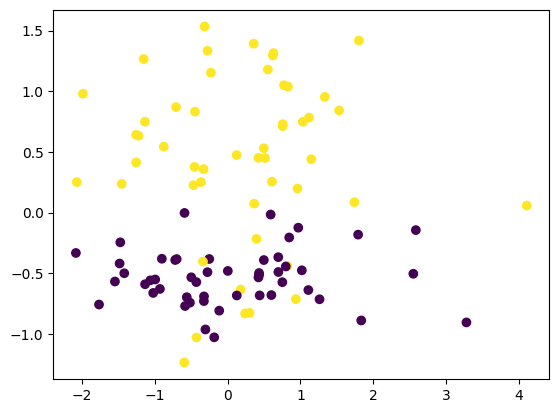

In [30]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


# helper function to plot decision boundaries
def plot_decision_regions(X, y, classifier, resolution=0.02, axis=None):
    if X.shape[1] != 2:
        raise ValueError(
            f'Die Daten dürfen maximal 2 Features besitzen. Es wurden aber Daten mit {X.shape[1]} Features übergeben.')
    ax = axis if axis is not None else plt.gca()

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    Zmax = np.abs(Z).max()
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap, levels=[-Zmax, 0, Zmax])
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=np.expand_dims(cmap(idx), 0),
                   marker=markers[idx], label=cl)
    if axis is None: 
        plt.title('k = {}'.format(classifier.n_neighbors))
        plt.show()


# generate 100 data points: features X, labels y
X_9_1, y_9_1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                                   n_clusters_per_class=1, class_sep=0.5, random_state=2)

plt.scatter(X_9_1[:, 0], X_9_1[:, 1], c=y_9_1)

(2) Fitten Sie einen [kNN-Klassifikator](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) an die Daten mit $k=1$ und visualisieren Sie mit der Hilfsfunktion `plot_decision_regions` die entstandenen Entscheidungsflächen.

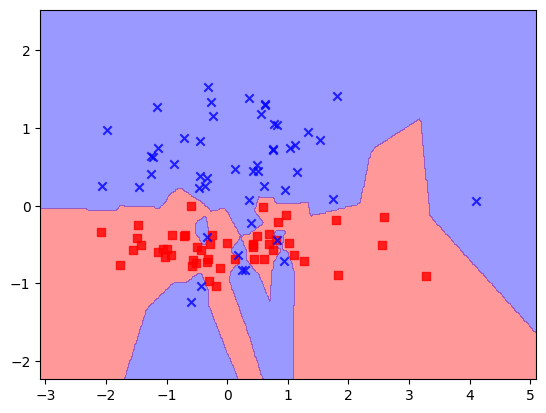

In [9]:
neight = KNeighborsClassifier(n_neighbors=1).fit(X_9_1, y_9_1)
plot_decision_regions(X_9_1, y_9_1, neight)

(3) Wiederholen Sie Schritt (2) für einige wenige Werte von $k$. Variieren Sie dabei $k$ zwischen $1$ und $50$. Wie verändern sich die Entscheidungsflächen? Wie verändert sich, Ihrer Meinung nach, die Komplexität des kNN-Modells mit dem Wert $k$?

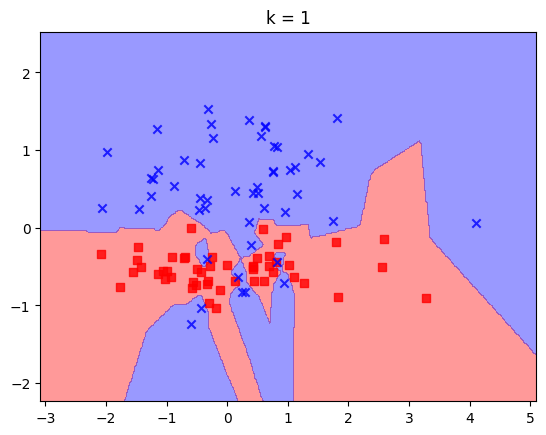

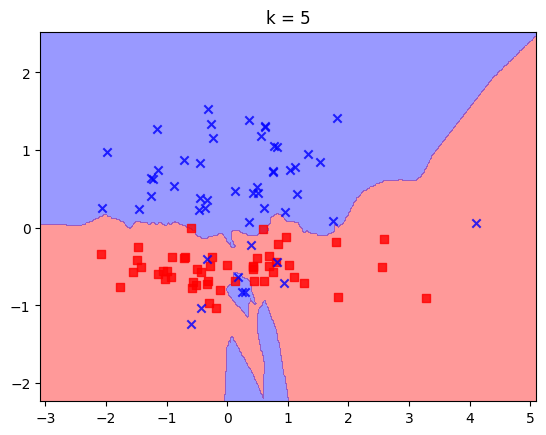

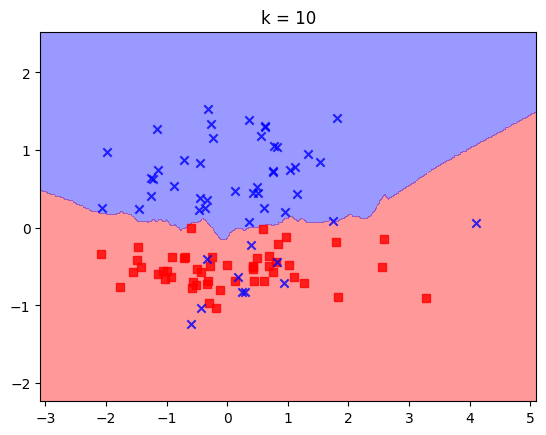

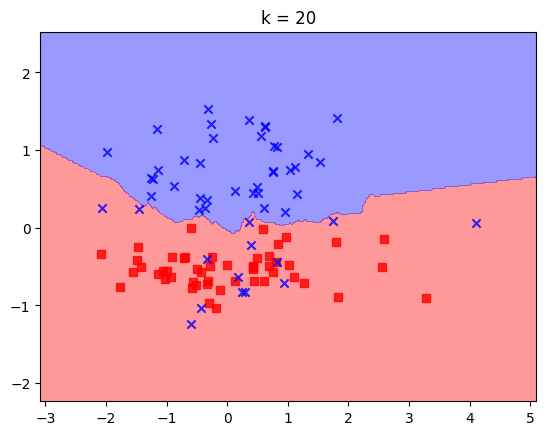

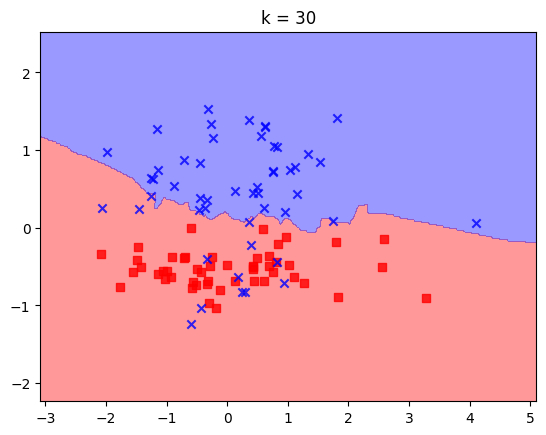

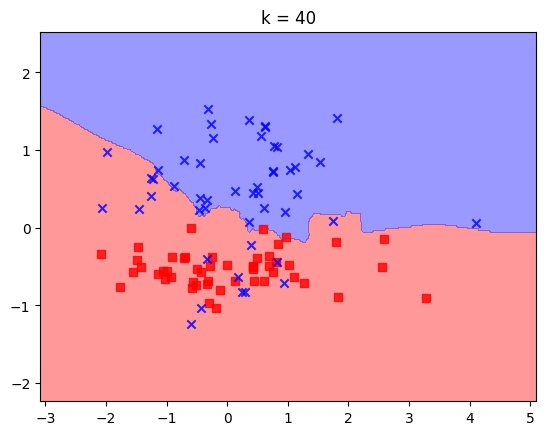

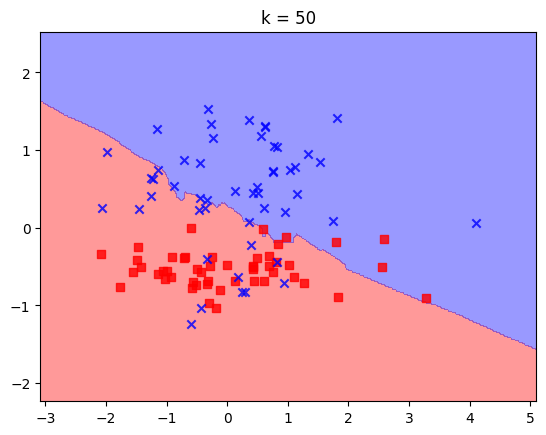

In [31]:
for k in 1, 5, 10, 20, 30, 40, 50:
    neight = KNeighborsClassifier(n_neighbors=k).fit(X_9_1, y_9_1)
    plot_decision_regions(X_9_1, y_9_1, neight)

Bei größerem $k$ nimmt die Modellkomplexität ab, was bis zu einem gewissen Grad $k\approx 30$ das Overfitting reduziert. 

(4) Machen Sie Ihre Visualisierung aus Schritt (3) interaktiv, indem Sie [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) benutzen, und über einen Slider Werte für $k$ auswählen können. Denken Sie daran, dass $k$ nur Integer-Werte annehmen kann!

In [32]:
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib qt
k_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=50, 
    step=1,
    readout_format='d'
)

# @interact ist ein Decorator und muss über einer Funktionsdefinition stehen.
# In den Klammern wird dem Parameter k, welcher in der Funktionsdefinition verwendet wird, der Slider z
# zugewiesen. 
@interact(k=k_slider)
def run_plot(k):
    plt.clf()
    plot_decision_regions(X_9_1, y_9_1, KNeighborsClassifier(n_neighbors=k).fit(X_9_1, y_9_1))

interactive(children=(IntSlider(value=1, description='k', max=50, min=1), Output()), _dom_classes=('widget-int…

### 9.2 Weindiagnostik (k-Nächste Nachbarn, Feature Scaling)

Die Weine dreier italienischer Landwirte wurden auf ihre chemische Zusammensetzung hin untersucht. Dabei entstand in den 80er Jahren ein Datensatz, der zu den Klassikern im Machine Learning zählt. Sie werden diesen Datensatz untersuchen und mit dem k-nächste-Nachbarn Modell anhand der chemischen Zusammensetzung (Features) vorhersagen, von welchem der drei Landwirte (Labels) der Wein stammt. Dabei werden wir auch der Skalierung der Features Beachtung schenken.

* Sie haben durch die vergangenen Übungen schon Erfahrungen bezüglich Hyperparametersuchen und dem Trainieren von Modellen gesammelt. Daher sind die unten stehenden Schritte weniger ausführlich gehalten. 


**Ihre Aufgaben**

(1) Machen Sie sich mit dem Datensatz vertraut. Wie viele Datenpunkte (Featurevektoren) gibt es? Wie viele Features?

In [33]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

### Obtaining the wine data set from the data UCI repository ###

# feature names
feature_names = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                 'Proanthocyanins', 'Color intensity', 'Hue',
                 'OD280/OD315 of diluted wines', 'Proline']

data = np.genfromtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                     delimiter=',')

X_9_2, y_9_2 = data[:, 1:], data[:, 0]

In [37]:
print('Es gibt {} Datenpunkte mit je {} einzelnen Features.'.format(*X_9_2.shape))

Es gibt 178 Datenpunkte mit je 13 einzelnen Features.


(2) Untersuchen Sie die Verteilungen der Features, indem Sie Histogramme für ausgewählte Features visualisieren. Was fällt Ihnen auf, wenn Sie die Verteilungen verschiedener Features miteinander vergleichen?

In [59]:
print(X_9_2[:, 1])
print(y_9_2)

[1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.73
 1.87 1.81 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  1.81 2.05 1.77 1.72
 1.9  1.68 1.5  1.66 1.83 1.53 1.8  1.81 1.64 1.65 1.5  3.99 1.71 3.84
 1.89 3.98 1.77 4.04 3.59 1.68 2.02 1.73 1.73 1.65 1.75 1.9  1.67 1.73
 1.7  1.97 1.43 0.94 1.1  1.36 1.25 1.13 1.45 1.21 1.01 1.17 0.94 1.19
 1.61 1.51 1.66 1.67 1.09 1.88 0.9  2.89 0.99 3.87 0.92 1.81 1.13 3.86
 0.89 0.98 1.61 1.67 2.06 1.33 1.83 1.51 1.53 2.83 1.99 1.52 2.12 1.41
 1.07 3.17 2.08 1.34 2.45 1.72 1.73 2.55 1.73 1.75 1.29 1.35 3.74 2.43
 2.68 0.74 1.39 1.51 1.47 1.61 3.43 3.43 2.4  2.05 4.43 5.8  4.31 2.16
 1.53 2.13 1.63 4.3  1.35 2.99 2.31 3.55 1.24 2.46 4.72 5.51 3.59 2.96
 2.81 2.56 3.17 4.95 3.88 3.57 5.04 4.61 3.24 3.9  3.12 2.67 1.9  3.3
 1.29 5.19 4.12 3.03 1.68 1.67 3.83 3.26 3.27 3.45 2.76 4.36 3.7  3.37
 2.58 4.6  3.03 2.39 2.51 5.65 3.91 4.28 2.59 4.1 ]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.

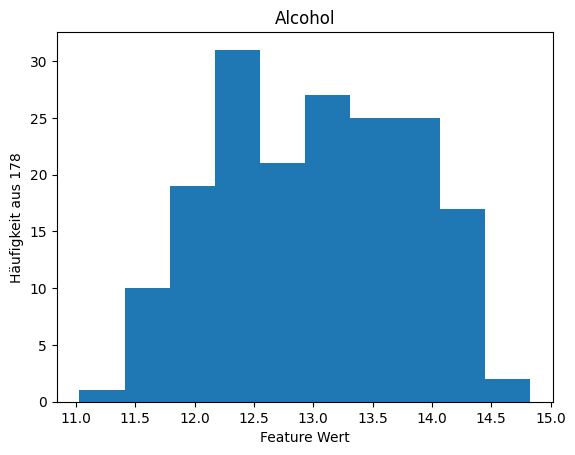

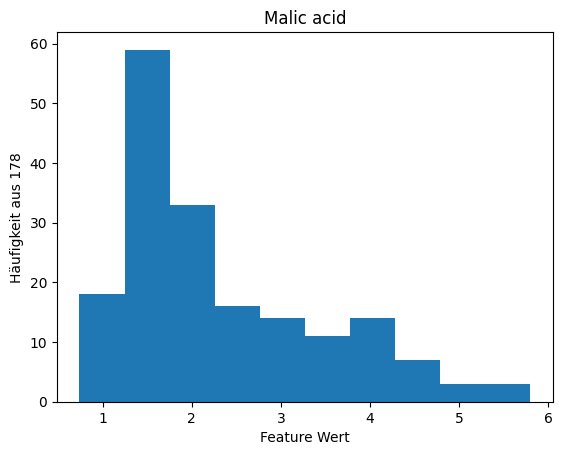

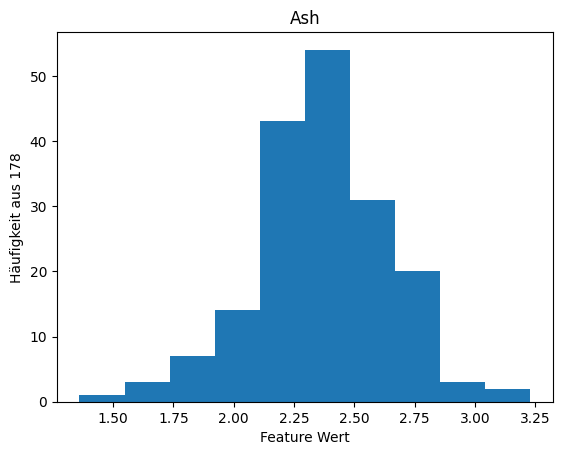

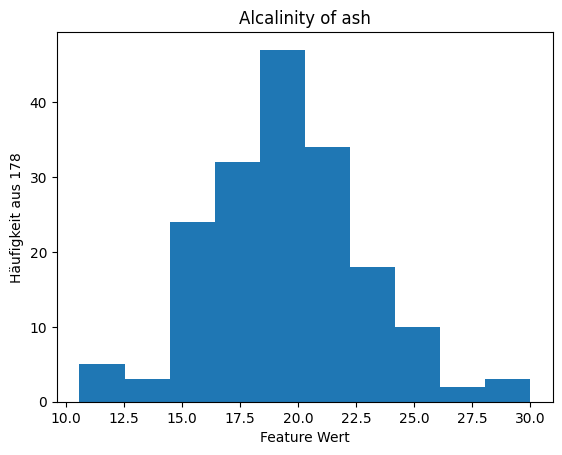

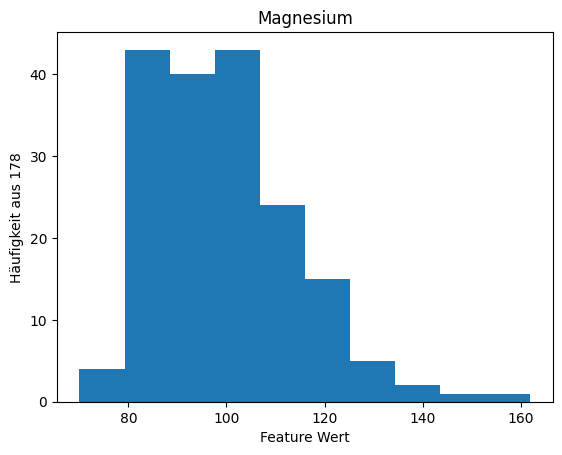

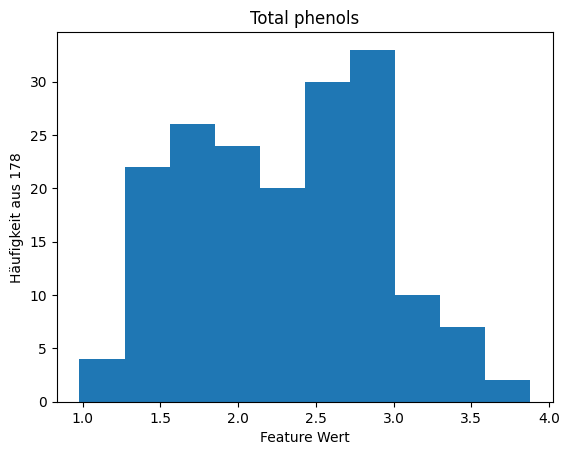

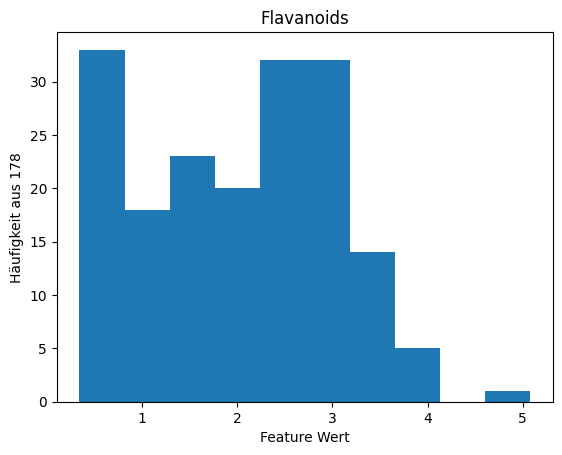

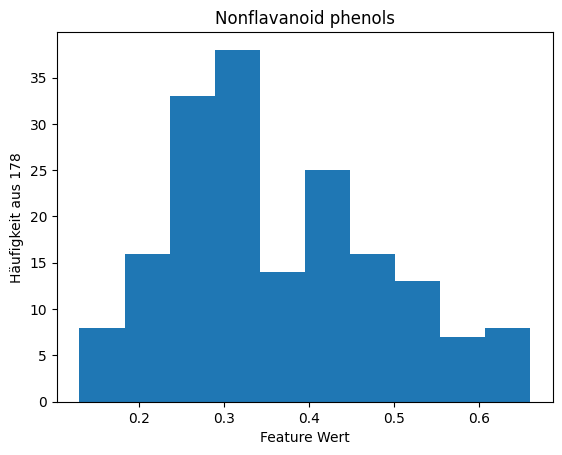

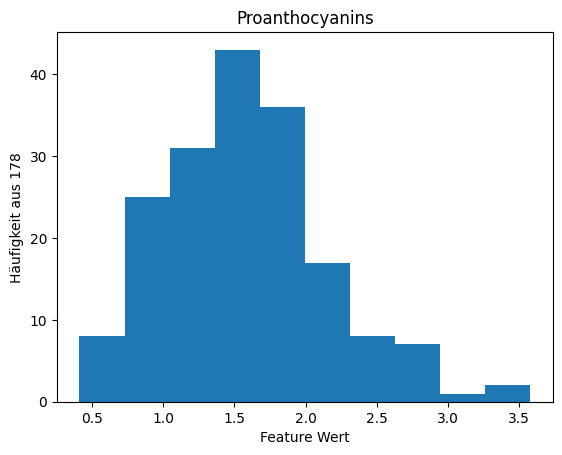

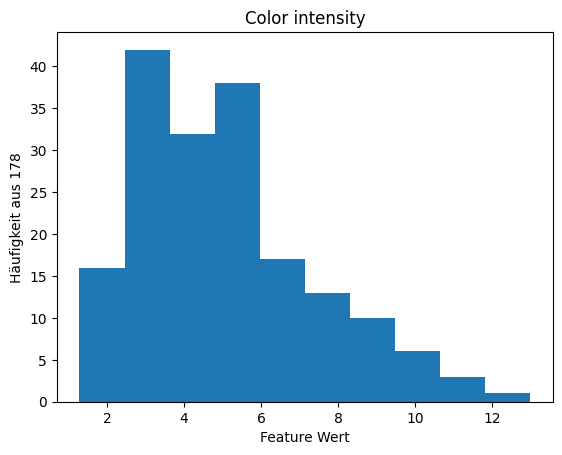

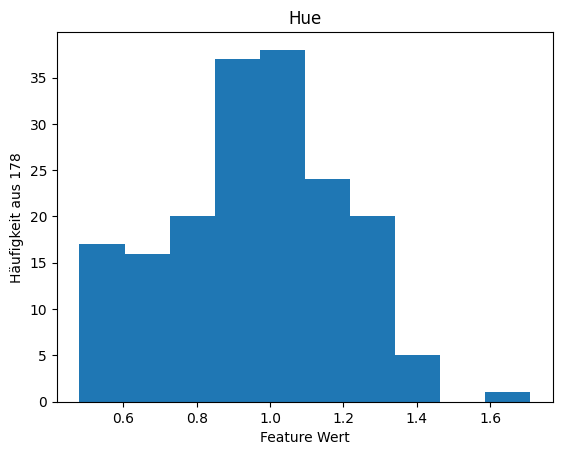

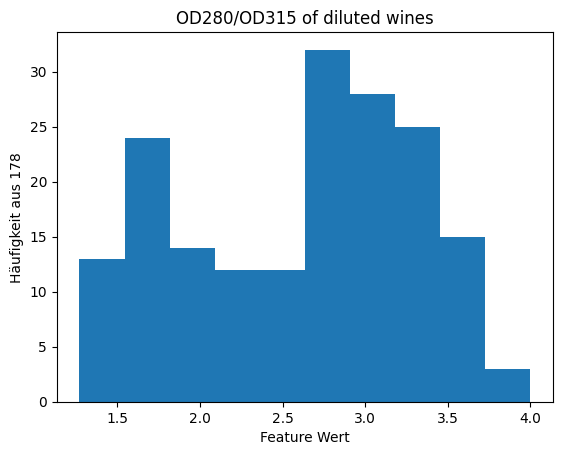

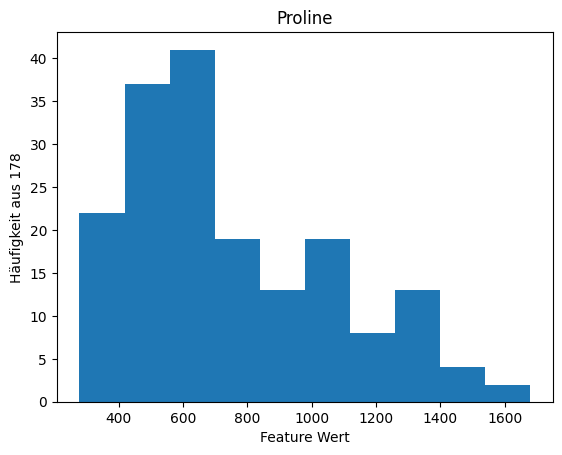

In [64]:
for spalte in range(X_9_2.shape[1]):
    plt.title(feature_names[spalte])
    plt.xlabel("Feature Wert")
    plt.ylabel('Häufigkeit aus {}'.format(X_9_2.shape[0]))
    plt.hist(X_9_2[:, spalte])
    plt.show()

Viele haben ein oder zwei Maximalstellen. @TODO

(3) Wir werden einen kNN-Klassifikator nutzen, um die Daten zu fitten. Dabei werden wir den euklidischen Abstand als Distanzmaß wählen. Was erwarten Sie aufgrund Ihrer Beobachtung aus (2) und der Nutzung des euklidischen Abstands?

@TODO

(4) [Erzeugen](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) Sie ein Trainingsset (90% der Daten) und ein Testset (10%). Fitten Sie einen [kNN-Klassifikator](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) an Ihre Trainingsdaten ($k=5$). Geben Sie die Genauigkeit (Accuracy) Ihres Fits für die Trainingsdaten an.

**Hinweise:**
* Bemerkung: Anstelle des In-Sample Fehlers betrachten wir hier die "Genauigkeit" (Accuracy). Diese werden Sie voraussichtlich noch in der letzten Vorlesung kennenlernen.
* Setzen Sie zur besseren Vergleichbarkeit Ihrer Ergebnisse beim Splitten der Daten den `seed=42`.

In [110]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_9_2, y_9_2, train_size=0.9, random_state=42)

pipe = make_pipeline(
    KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
)
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.76875

(5) Wiederholen Sie Schritt (4), allerdings für Trainingsdaten, deren Features Sie auf Mittelwert $0$ und Varianz $1$ [normiert](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) haben. Welche Genauigkeit (Accuracy) erhalten Sie nun auf den Trainingsdaten? Wie erklären Sie sich diese Veränderung im Vergleich zu dem Ergebnis aus Schritt (4)?

In [111]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_9_2, y_9_2, train_size=0.9, random_state=42)

pipe = make_pipeline(
    StandardScaler(), 
    KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
)
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.9875

Die Genauigkeit wird signifikat verbessert, was daran liegt, dass Features mit höheren Domänen wie _Proline_ oder _Magnesium_ weniger ins Gewicht fallen. 

(6) Erzeugen Sie eine [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html), um die Skalierung der Features und den Klassifikator miteinander zu kombinieren. Bestimmen Sie mittels 10-facher [Kreuzvalidierung](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) den besten Wert für die Anzahl $k$ der nächsten Nachbarn. Untersuchen Sie dabei $k=\{1,\ldots, 80\}$ (Name des Parameters in der Parameterliste: `kneighborsclassifier__n_neighbors` bzw. `VonIhnenGewählteName__n_neighbors`, wobei "VonIhnenGewählteName" dem Namen entspricht, dem Sie dem kNN-Klassifikator in der Pipeline gegeben haben). Verwenden Sie als Metrik zur Bestimmung der optimalen Anzahl Nachbarn in der Kreuzvalidierung die Accuracy.

**Hinweise:**
* Wenn Sie sich noch einmal vergegenwärtigen wollen, wie Pipelines in scikit-learn konstruiert werden, so finden Sie [hier](https://scikit-learn.org/stable/modules/compose.html#construction) Informationen sowie in Übung 6.1 (dort: Schritte 5 und 6).
* Führen Sie die Kreuzvalidierung ebenfalls nur mit den Trainingsdaten durch.

(7) Visualisieren Sie die Accuracy als Funktion von $k$. Bestimmen Sie den besten Wert $k$.
* Betrachten Sie den ungefähren (groben) Verlauf der Kurve: Warum beobachten Sie diesen Verlauf? (Wie ändert sich die Modellkomplexität mit $k$?)

(8) Geben Sie die Accuracy für das beste Modell einmal für die Trainingsdaten und ein weiteres Mal für die Testdaten aus.

### 9.3 Support Vector Machine
In dieser Übung werden wir uns mit einem Datensatz beschäftigen, der nicht mithilfe eines Perzeptrons klassifiziert werden kann. Stattdessen nutzen wir eine nichtlineare Soft-Margin SVM, mit der Sie sich in dieser Übung vertraut machen werden. Wir werden mt RBF Kerneln arbeiten.

**Ihre Aufgaben**

(1) Machen Sie sich mit dem Datensatz vertraut und visualisieren Sie die Trainingsdaten in einem Plot (farbkodieren Sie die Labels, sodass Sie die beiden Klassen im Plot unterscheiden können). Wie viele Datenpunkte sind in Ihrem Trainingsset? Wie viele Features enthält jeder Featurevektor?

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as pltcol
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV


# helper function to plot decision boundaries
def plot_decision_regions(X, y, classifier, resolution=0.02, axis=None):
    if X.shape[1] != 2:
        raise ValueError(
            f'Die Daten dürfen maximal 2 Features besitzen. Es wurden aber Daten mit {X.shape[1]} Features übergeben.')
    ax = axis if axis is not None else plt.gca()

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    Zmax = np.abs(Z).max()
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap, levels=[-Zmax, 0, Zmax])
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=np.expand_dims(cmap(idx), 0),
                   marker=markers[idx], label=cl)
    if axis is None: plt.show()


# helper function to plot a 3d surface plot of the decision function of a classifier
def plot_decision_function(X, y, classifier, resolution=0.02, cell_count=50, figsize=10):
    """
    :param resolution: resolution of the grid that is used to scan the decision function; can be ignored in most cases
    :param cell_count: number of rows and columns the surface plot is divided into; affects the resolution of the surface plot and decreases performance of the animation
    :param figsize: size of the plot
    """
    if X.shape[1] != 2:
        raise ValueError(
            f'Die Daten dürfen maximal 2 Features besitzen. Es wurden aber Daten mit {X.shape[1]} Features übergeben.')

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision function
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    fig = plt.figure(figsize=(figsize, figsize))
    ax = fig.add_subplot(projection='3d')
    normalisation = pltcol.BoundaryNorm([-1, 0, 1], cmap.N)
    ax.plot_surface(xx1, xx2, Z, cmap=cmap, alpha=0.3, antialiased=True, norm=normalisation, rcount=cell_count,
                    ccount=cell_count)
    ax.view_init(15, -93)

    # plot class samples
    predictions = classifier.predict(X)
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(X[y == cl, 0], X[y == cl, 1], predictions[y == cl] * max(abs(Z.min()), Z.max()), alpha=0.8,
                   color=cmap(idx), marker=markers[idx], label=cl)
    plt.show()


# function to generate the data set
def get_data():
    # create data set with training and test set
    np.random.seed(1)
    X = np.random.randn(300, 2)
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
    y = np.where(y, 1, -1)

    # split data
    X_train = X[:200, :]
    y_train = y[:200]

    X_test = X[200:, :]
    y_test = y[200:]

    return X_train, y_train, X_test, y_test


# X_train: (N x d) matrix containing N feature vectors with d features each
X_9_3_train, y_9_3_train, X_9_3_test, y_9_3_test = get_data()

# for visualization purposes use: plot_decision_regions(X_train, y_train, classifier)
# and plot_decision_function(X_train, y_train, classifier)

# you can create subplots of the decision regions (does not work for decision functions!) by passing specific axes as parameters,
# example of a 2x2 grid:
# _, axes = plt.subplots(2, 2, figsize=(10, 10))
# axes = axes.flatten()
# for a, c in zip(axes, classifiers):
#     plot_decision_regions(X_train, y_train, c, axis=a)

(2) Support Vector Machines sind dafür bekannt, besonders sensibel auf unterschiedliche Skalierung von Features zu reagieren. Überzeugen Sie sich also davon, dass die unterschiedlichen Features, mit denen Sie es zu tun haben, bereits skaliert sind, indem Sie testweise Mittelwerte und Standardabweichungen bestimmen.

(3) Erstellen Sie eine nonlinear Soft Margin SVM mit RBF Kernel.
* Machen Sie sich dazu zunächst mit der [Dokumentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) vertraut und erinnern Sie sich an die Vorlesung.
* Welche Rolle spielen die beiden Parameter, die Sie wählen müssen?
* Wählen Sie zunächst $C=0.1$ und $\gamma=0.1$ und fitten Sie die SVM an die Trainingsdaten. Nutzen Sie die Funktionen `plot_decision_regions` und `plot_decision_function`, um die resultierende Entscheidungskurve zu visualisieren.

**Hinweis:**
Es gibt in Jupyter Notebooks theoretisch die Möglichkeit, sich 3D Plots interaktiv anzuschauen (rotieren der Grafik per Maus, etc.). Diese Funktion wird allerdings nicht von allen Editoren unterstützt, weshalb wir sie standardmäßig nicht aktiviert haben. Wenn Sie ausprobieren wollen, sich den Plot der `plot_decision_function` Methode interaktiv anzuzeigen, ersetzen Sie den Befehl `%matplotlib inline` in der ersten Code-Zelle mit dem Befehl `%matplotlib notebook`, starten den Kernel neu und wiederholen Ihre Ausführung. Sollte es dabei zu Fehlermeldungen kommen, können Sie alternativ noch den Befehl `%matplotlib widget` ausprobieren.
Wir freuen uns, wenn die interaktive Visualisierung bei Ihnen funktioniert. Sollte sie nicht funktionieren, arbeiten Sie einfach mit der ursprünglichen Version (`%matplotlib inline`) weiter und halten Sie sich nicht allzu lange mit der Fehleranalyse auf.

(4) Gewinnen Sie eine Intuition für den Einfluss der Hyperparameter $\gamma$ und $C$:
* Variation von $C$: Setzen Sie $\gamma=0.1$ und visualisieren Sie die Entscheidungskurven für $C=0.1$ und $C=1000$. Was fällt Ihnen auf? Welche Rolle spielt $C$?
* Variation von $\gamma$: Setzen Sie $C=0.1$ und visualisieren Sie die Entscheidungskurven für $\gamma=0.1$ und $\gamma=10$. Was fällt Ihnen auf? Welche Rolle spielt $\gamma$?
* Betrachten Sie noch einmal Ihre Visualisierungen: Nimmt die Modellkomplexität zu oder ab mit zunehmendem oder fallenden Werten für $\gamma$ und $C$?

**Hinweis:**
Falls die Entscheidungsflächen, die Sie mit der Funktion `plot_decision_reggions` erhalten, von den Entscheidungskurven der Funktion `plot_decision_fuction` abweichen, könnte dies an der relativ groben Auflösung des surface plots liegen. Sie können diese Auflösung mithilfe des Parameters `cell_count` erhöhen, dadurch sinkt allerdings die Performance der Animation des 3D Plots stark ab.

(5) Wir werden nun die Hyperparameter $\gamma$ und $C$ über eine Gittersuche mit V-facher Kreuzvalidierung auf den Trainingsdaten bestimmen.
* Nutzen Sie scikit-learn, um eine [Gittersuche mit V-facher Kreuzvalidierung](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) durchzuführen (Sie haben dies bereits in einer der vorherigen Übungen gemacht). Wählen Sie $V=5$ Folds und suchen Sie den Raum der Hyperparameterpaare wie folgt ab: Variieren Sie $\gamma$ in 10er Potenzen von $10^{-9}$ bis $10^{3}$, während sie $C$ ebenfalls in 10-er Potenzen von $10^{-2}$ bis $10^{11}$ [variieren](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html). Wählen Sie als Option für Ihre Suche die Scoring Function 'accuracy'.
* **Accuracy**: Sie kennen bisher den Klassifikationsfehler als die Anzahl der fehlklassifizierten Punkte dividiert durch die Anzahl aller Punkte. Die Accuracy ist definiert als die Anzahl der richtig klassifizierten Punkte dividiert durch die Anzahl aller Punkte. Sie lässt sich damit interpretieren als Prozentsatz aller richtig klassifizierten Punkte.

(6) Gewinnen Sie die Cross Validation Accuracies über die Methode `.cv_results_['mean_test_score']` und [visualisieren](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) Sie diese farbkodiert in einer $(\gamma, C)$ Ebene. Bestimmen Sie die beste Parameterkombination $(\gamma^*, C^*)$, für die Ihre SVM die größte Accuracy zeigt. Geben Sie diese Parameter an.

(7) Ermitteln Sie aus Ihrer Gittersuche die zu $(\gamma^*, C^*)$ ermittelte Accuracy. Vergleichen Sie diese mit der Accuracy, die Sie mit $(\gamma^*, C^*)$ auf den Testdaten erzielen. Lieferte die Kreuzvalidierung eine gute Schätzung für die Größe, die Sie auf den Testdaten erzielten?

(8) Visualisieren Sie mit `plot_decision_region` die Test- und Trainingsdaten für $(\gamma^*, C^*)$.